In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
!ls zippedData/

bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [3]:
# Below is the csv file called TN_data that we used to look into the data behind budgets for movies and the correlation to gross profit that those budgets had.
TN_data = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [4]:
TN_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
# Removed dollar sign to change string into an integer.
TN_data['production_budget'] = TN_data['production_budget'].str.replace('$' , '')

In [6]:
# Removed comma to change string into an integer.
TN_data['production_budget'] = TN_data['production_budget'].str.replace(',' , '')

In [7]:
# Set type as an integer instead of a string.
TN_data['production_budget'] = TN_data['production_budget'].astype(int)

In [8]:
# Removed dollar sign to change string into an integer. 
TN_data['worldwide_gross'] = TN_data['worldwide_gross'].str.replace('$' , '')

In [9]:
# Set type as an integer instead of a string. 
TN_data['worldwide_gross'] = TN_data['worldwide_gross'].str.replace(',' , '').astype('int64')

In [10]:
TN_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 248.6+ KB


In [11]:
x = list(TN_data['worldwide_gross'].values)

In [12]:
y = list(TN_data['production_budget'].values)

In [13]:
plt.show()

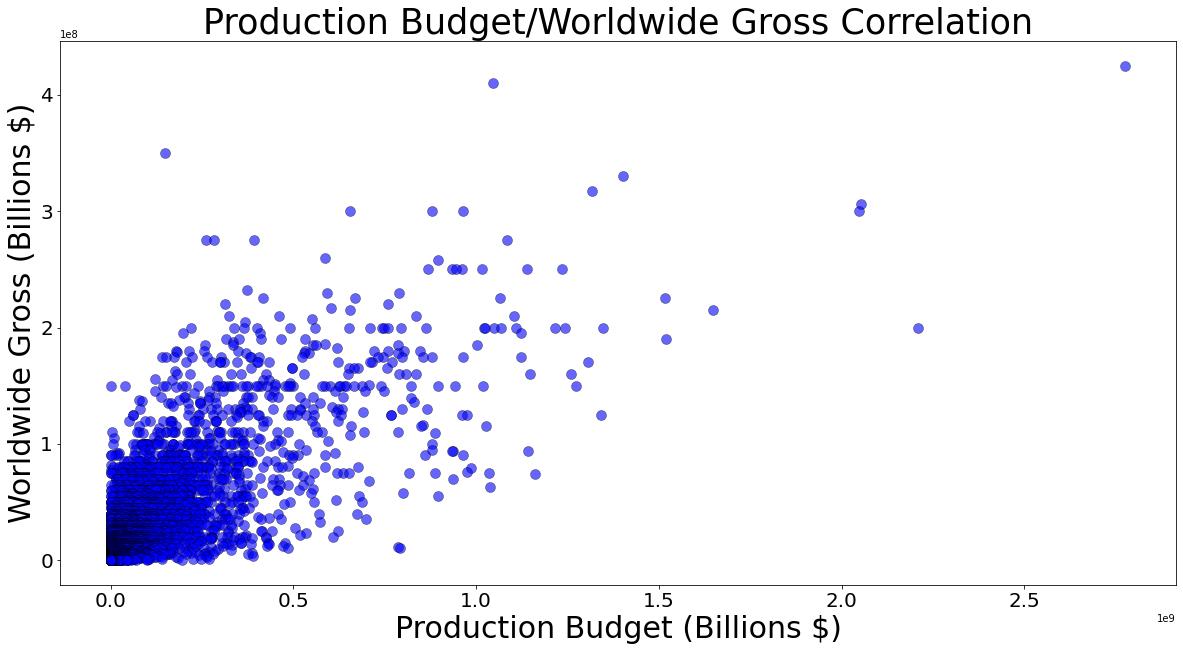

In [14]:
# Set x and y axes with the above data as values thata re displayed below.
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(TN_data['worldwide_gross'],TN_data['production_budget'], color='blue', 
                        alpha=.6, edgecolor='black', linewidth=.5, s=100)

ax.set_title('Production Budget/Worldwide Gross Correlation', fontsize = 35)
ax.set_ylabel('Worldwide Gross (Billions $)', fontsize = 30)
ax.set_xlabel('Production Budget (Billions $)', fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

;


fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)

fig.savefig('production_budget_worldwide_gross_correlation.png', facecolor=fig.get_facecolor(), edgecolor='none')

In [54]:
# Set the data we used for the popularity and month released to determine which month was the most popular month for movies on average.
TMDB_data = pd.read_csv("zippedData/tmdb.movies.csv.gz", parse_dates = ['release_date'])

In [55]:
# We used this data to see the popularity and release date as well as how exactly the vote count and average was broken down.
TMDB_data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [56]:
type(TMDB_data['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
# Sorted values in order from highest to lowest in regards to vote count
TMDB_data.sort_values('vote_count', ascending = False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
17383,17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
11032,11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
...,...,...,...,...,...,...,...,...,...,...
14071,14071,[],312155,en,Merely Players,0.600,2014-12-16,Merely Players,3.0,1
14075,14075,[],287781,en,24 Hours,0.600,2014-07-25,24 Hours,3.0,1
14078,14078,[27],274257,en,The First Wave,0.600,2014-01-10,The First Wave,3.0,1
14087,14087,[35],365539,en,Cinema Purgatorio,0.600,2014-06-01,Cinema Purgatorio,2.5,1


In [58]:
TMDB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [66]:
# Targeted the month column and more specifically the month column so that we could determine what month would be the most and least popular month to release a movie.
TMDB_data['month'] = TMDB_data['release_date'].dt.month

In [60]:
# Set the average popularity per month in order from highest to lowest
popularity_by_month = TMDB_data.groupby('month')['popularity'].mean().sort_values(ascending=False)

In [61]:
popularity_by_month = popularity_by_month.reset_index()

In [62]:
popularity_by_month

,month,popularity
0,12,3.922681
1,7,3.585265
2,8,3.580677
3,11,3.459795
4,2,3.352600
5,9,3.265490
6,5,3.123663
7,10,3.081957
8,3,3.052933
9,6,3.043683


In [67]:
popularity_by_month = popularity_by_month.sort_values("month")

In [68]:
# Set the x label months by the words of the months instead of the numbers. 
month_labels = ['Jan','Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

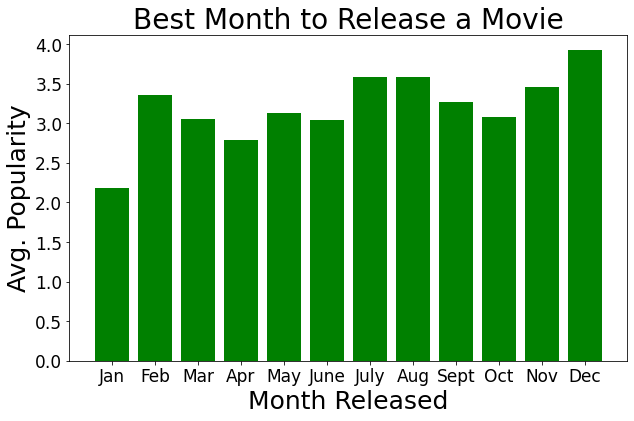

In [65]:
# Set the bar plot
plot_one_fig, plot_one_ax = plt.subplots(figsize=(10,6))
# Used month and popularity as the targeted columns and the color as green.
plot_one_ax.bar(popularity_by_month['month'], popularity_by_month['popularity'], color = 'green')
# Set fontsizes and labels for the axes and title.
plot_one_ax.set_title(('Best Month to Release a Movie'), fontsize = 28)
plot_one_ax.set_ylabel(('Avg. Popularity'), fontsize = 25)
plot_one_ax.set_xlabel(('Month Released'), fontsize = 25)
plt.xticks(ticks = popularity_by_month['month'], labels = month_labels, fontsize=17)
plt.yticks(fontsize=17)


plot_one_fig.patch.set_facecolor('white')
plot_one_fig.patch.set_alpha(1)

plot_one_fig.savefig('popularity_by_month.png', facecolor=plot_one_fig.get_facecolor(), edgecolor='none')

